# XGBoost

In [53]:
import numpy as np
import pandas as pd

In [54]:
# Đọc dữ liệu từ pandas
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [55]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [56]:
X = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [57]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 31


In [58]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sử dụng OHE để mã hóa các categories của dữ liệu, Label Encode để mã hóa lại đầu ra của y
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [59]:
X_origin = X.copy()
y_origin = y.copy()

In [60]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [61]:
X_encode['Attrition'] = X_encode['Attrition'].map({'Yes':1, 'No':0})

In [62]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,0,279,8,61,5130,24907,1,23,10,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,1392,3,56,2909,23159,1,11,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,40,3468,16632,9,12,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,4,17,17,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,42,9991,21457,4,15,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,87,6142,5174,1,20,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,63,5390,13243,2,14,17,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
y_encode = label_encoder.fit_transform(y)

In [64]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

<Axes: >

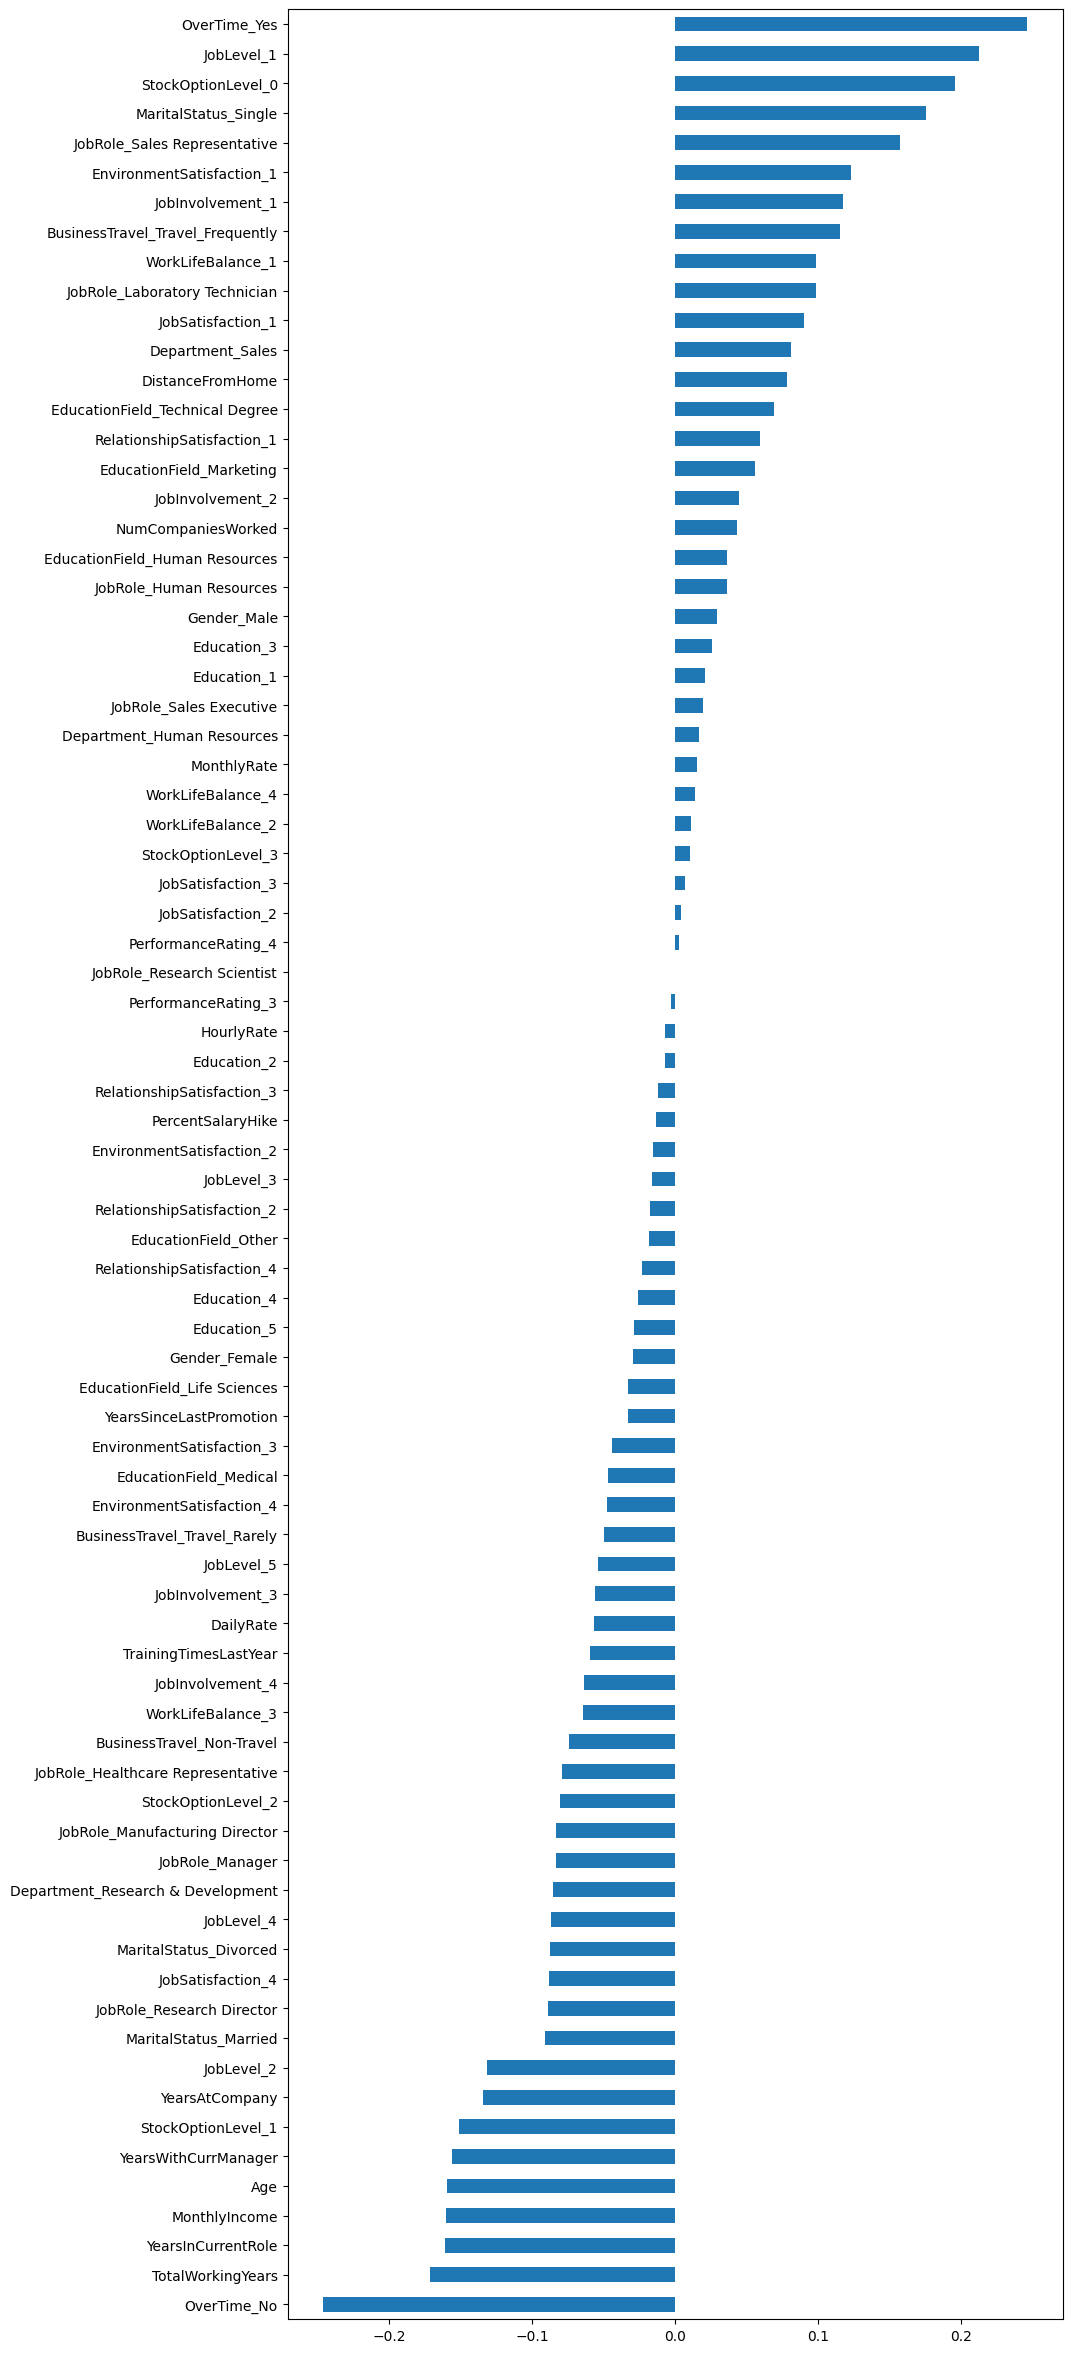

In [65]:
X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [66]:
feature_correlation = X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

59

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

X_encode_copy = X_encode.drop('Attrition', axis=1)
y_encode_copy = y_encode

X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)
# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [68]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

class XGBoostFromScratch:
    """
    XGBoost implementation from scratch

    Công thức chính:
    obj = Σ[L(yi, ŷi)] + Σ[Ω(fk)]

    Trong đó:
    - L: Loss function (log loss cho classification)
    - Ω: Regularization term = γT + (1/2)λΣ(w²)
    - T: số lá của cây
    - w: trọng số của mỗi lá
    """

    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_child_weight=1, gamma=0, subsample=1.0,
                 colsample_bytree=1.0, reg_lambda=1, reg_alpha=0,
                 scale_pos_weight=1, random_state=42):
        """
        Parameters:
        -----------
        n_estimators : số lượng cây (boosting rounds)
        learning_rate : tốc độ học (η)
        max_depth : độ sâu tối đa của cây
        min_child_weight : tổng hessian tối thiểu trong node con
        gamma : γ - loss reduction tối thiểu để split
        subsample : tỷ lệ sample cho mỗi cây
        colsample_bytree : tỷ lệ features cho mỗi cây
        reg_lambda : λ - L2 regularization
        reg_alpha : α - L1 regularization
        scale_pos_weight : cân bằng class (cho imbalanced data)
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_child_weight = min_child_weight
        self.gamma = gamma
        self.subsample = subsample
        self.colsample_bytree = colsample_bytree
        self.reg_lambda = reg_lambda
        self.reg_alpha = reg_alpha
        self.scale_pos_weight = scale_pos_weight
        self.random_state = random_state

        self.trees = []
        self.base_prediction = 0

    def _sigmoid(self, x):
        """Sigmoid function: σ(x) = 1 / (1 + e^(-x))"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def _log_loss_gradient(self, y_true, y_pred):
        """
        Gradient của log loss (Cross-entropy)

        Công thức:
        gi = ∂L/∂ŷ = ŷi - yi

        Với ŷi = σ(raw_prediction)
        """
        # Áp dụng scale_pos_weight
        weights = np.where(y_true == 1, self.scale_pos_weight, 1.0)
        probs = self._sigmoid(y_pred)
        gradient = (probs - y_true) * weights
        return gradient

    def _log_loss_hessian(self, y_true, y_pred):
        """
        Hessian của log loss

        Công thức:
        hi = ∂²L/∂ŷ² = ŷi(1 - ŷi)

        Với ŷi = σ(raw_prediction)
        """
        weights = np.where(y_true == 1, self.scale_pos_weight, 1.0)
        probs = self._sigmoid(y_pred)
        hessian = probs * (1 - probs) * weights
        return hessian

    def _calculate_leaf_weight(self, gradient, hessian):
        """
        Tính trọng số tối ưu cho lá

        Công thức XGBoost:
        w* = -Σgi / (Σhi + λ)

        Trong đó:
        - gi: gradient của samples trong lá
        - hi: hessian của samples trong lá
        - λ: L2 regularization
        """
        G = np.sum(gradient)
        H = np.sum(hessian)
        weight = -G / (H + self.reg_lambda)
        return weight

    def _calculate_gain(self, left_grad, left_hess, right_grad, right_hess, parent_grad, parent_hess):
        """
        Tính Gain từ việc split

        Công thức XGBoost:
        Gain = 1/2 * [(GL²/(HL+λ)) + (GR²/(HR+λ)) - (G²/(H+λ))] - γ

        Trong đó:
        - GL, GR: tổng gradient của left/right child
        - HL, HR: tổng hessian của left/right child
        - G, H: tổng gradient/hessian của parent
        - γ: complexity cost (gamma)
        - λ: L2 regularization
        """
        GL = np.sum(left_grad)
        HL = np.sum(left_hess)
        GR = np.sum(right_grad)
        HR = np.sum(right_hess)
        G = np.sum(parent_grad)
        H = np.sum(parent_hess)

        gain = 0.5 * (
            (GL**2 / (HL + self.reg_lambda)) +
            (GR**2 / (HR + self.reg_lambda)) -
            (G**2 / (H + self.reg_lambda))
        ) - self.gamma

        return gain

    def _find_best_split(self, X, gradient, hessian, feature_indices):
        """
        Tìm split tốt nhất dựa trên Gain

        Thuật toán:
        1. Với mỗi feature, thử tất cả các split points
        2. Tính Gain cho mỗi split
        3. Chọn split có Gain cao nhất
        """
        best_gain = -np.inf
        best_feature = None
        best_threshold = None

        for feature_idx in feature_indices:
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            # Thử split tại trung điểm giữa các giá trị unique
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask

                # Kiểm tra min_child_weight
                if np.sum(hessian[left_mask]) < self.min_child_weight:
                    continue
                if np.sum(hessian[right_mask]) < self.min_child_weight:
                    continue

                # Tính Gain
                gain = self._calculate_gain(
                    gradient[left_mask], hessian[left_mask],
                    gradient[right_mask], hessian[right_mask],
                    gradient, hessian
                )

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree(self, X, gradient, hessian, depth=0, feature_indices=None):
        """
        Xây dựng cây quyết định theo thuật toán XGBoost

        Quy trình:
        1. Tìm best split
        2. Nếu không split được → tạo leaf node
        3. Nếu split được → tạo internal node và đệ quy cho left/right
        """
        if feature_indices is None:
            n_features = X.shape[1]
            n_features_sample = int(n_features * self.colsample_bytree)
            feature_indices = np.random.choice(n_features, n_features_sample, replace=False)

        # Điều kiện dừng
        if depth >= self.max_depth or len(X) < 2:
            return {'leaf': True, 'weight': self._calculate_leaf_weight(gradient, hessian)}

        # Tìm best split
        best_feature, best_threshold, best_gain = self._find_best_split(
            X, gradient, hessian, feature_indices
        )

        # Nếu không tìm được split tốt
        if best_feature is None or best_gain <= 0:
            return {'leaf': True, 'weight': self._calculate_leaf_weight(gradient, hessian)}

        # Tạo left và right children
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_child = self._build_tree(
            X[left_mask], gradient[left_mask], hessian[left_mask],
            depth + 1, feature_indices
        )
        right_child = self._build_tree(
            X[right_mask], gradient[right_mask], hessian[right_mask],
            depth + 1, feature_indices
        )

        return {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_child,
            'right': right_child
        }

    def _predict_tree(self, tree, X):
        """Dự đoán sử dụng một cây"""
        if tree['leaf']:
            return np.full(len(X), tree['weight'])

        left_mask = X[:, tree['feature']] <= tree['threshold']
        predictions = np.zeros(len(X))

        if np.any(left_mask):
            predictions[left_mask] = self._predict_tree(tree['left'], X[left_mask])
        if np.any(~left_mask):
            predictions[~left_mask] = self._predict_tree(tree['right'], X[~left_mask])

        return predictions

    def fit(self, X, y):
        """
        Huấn luyện XGBoost

        Thuật toán:
        1. Khởi tạo prediction = 0 (hoặc log(pos/neg))
        2. For t = 1 to n_estimators:
            a. Tính gradient và hessian
            b. Xây dựng cây mới để fit residuals
            c. Cập nhật prediction += learning_rate * tree_prediction
        """
        np.random.seed(self.random_state)
        X = np.array(X)
        y = np.array(y)

        # Khởi tạo base prediction
        # Sử dụng log-odds cho binary classification
        pos_count = np.sum(y == 1)
        neg_count = np.sum(y == 0)
        self.base_prediction = np.log((pos_count + 1e-10) / (neg_count + 1e-10))

        # Prediction hiện tại (raw score, chưa qua sigmoid)
        current_predictions = np.full(len(y), self.base_prediction)

        # Training loop
        for i in range(self.n_estimators):
            # Subsample
            if self.subsample < 1.0:
                n_samples = int(len(X) * self.subsample)
                sample_indices = np.random.choice(len(X), n_samples, replace=False)
                X_sample = X[sample_indices]
                y_sample = y[sample_indices]
                pred_sample = current_predictions[sample_indices]
            else:
                X_sample = X
                y_sample = y
                pred_sample = current_predictions

            # Tính gradient và hessian
            gradient = self._log_loss_gradient(y_sample, pred_sample)
            hessian = self._log_loss_hessian(y_sample, pred_sample)

            # Xây dựng cây mới
            tree = self._build_tree(X_sample, gradient, hessian)
            self.trees.append(tree)

            # Cập nhật predictions
            tree_predictions = self._predict_tree(tree, X)
            current_predictions += self.learning_rate * tree_predictions

            # In progress (optional)
            if (i + 1) % 20 == 0:
                train_probs = self._sigmoid(current_predictions)
                train_preds = (train_probs >= 0.5).astype(int)
                acc = accuracy_score(y, train_preds)
                print(f"Iteration {i+1}/{self.n_estimators} - Train Accuracy: {acc:.4f}")

        return self

    def predict_proba(self, X):
        """Dự đoán xác suất"""
        X = np.array(X)
        raw_predictions = np.full(len(X), self.base_prediction)

        for tree in self.trees:
            tree_predictions = self._predict_tree(tree, X)
            raw_predictions += self.learning_rate * tree_predictions

        probs = self._sigmoid(raw_predictions)
        return np.vstack([1 - probs, probs]).T

    def predict(self, X):
        """Dự đoán class"""
        probs = self.predict_proba(X)[:, 1]
        return (probs >= 0.5).astype(int)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

def evaluate(model, X_train, X_test, y_train, y_test):
    print("\n========== TRAINING MODEL ==========")
    model.fit(X_train, y_train)
    print("Model has been fitted.\n")
    # =====================
    # 1. Dự đoán với threshold = 0.5
    # =====================
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("\n========== TRAINING RESULTS (threshold=0.5) ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"ACCURACY: {accuracy_score(y_train, y_train_pred):.4f}")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)))

    print("\n========== TEST RESULTS (threshold=0.5) ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"ACCURACY: {accuracy_score(y_test, y_test_pred):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)))

    # =====================
    # 2. Tìm threshold tối ưu theo F1
    # =====================
    print("\n========== FINDING OPTIMAL THRESHOLD ==========")
    y_test_proba = model.predict_proba(X_test)[:, 1]

    best_threshold = 0.0
    best_f1 = 0.0

    for threshold in np.arange(0.2, 0.6, 0.05):
        y_pred = (y_test_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Optimal threshold: {best_threshold}")
    print(f"Best F1-score: {best_f1:.4f}")

    # =====================
    # 3. Đánh giá lại TEST với threshold tối ưu
    # =====================
    y_test_pred_opt = (y_test_proba >= best_threshold).astype(int)

    print("\n========== TEST RESULTS WITH OPTIMAL THRESHOLD ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_test_pred_opt))
    print(f"ACCURACY: {accuracy_score(y_test, y_test_pred_opt):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred_opt, output_dict=True)))


In [70]:
# before tối ưu
# xgb_scratch = XGBoostFromScratch(
#         n_estimators=100,
#         learning_rate=0.1,
#         max_depth=3,
#         min_child_weight=5,
#         gamma=0.1,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         reg_lambda=1,
#         scale_pos_weight=5.67,  # 863/166 ≈ 5.67
#         random_state=42
#     )

# after tối ưu
# xgb_scratch = XGBoostFromScratch(
#     n_estimators=50,           # Giảm overfitting
#     learning_rate=0.05,        # Học chậm hơn
#     max_depth=3,
#     min_child_weight=10,       # Tăng regularization
#     gamma=0.5,                 # Tăng complexity cost
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_lambda=2,              # Tăng L2
#     scale_pos_weight=1,        # Không cần nữa vì đã SMOTE
#     random_state=42
# )

# xgb_scratch = XGBoostFromScratch(
#     n_estimators=50,           # Giảm overfitting
#     learning_rate=0.05,        # Học chậm hơn
#     max_depth=3,
#     min_child_weight=10,       # Tăng regularization
#     gamma=0.5,                 # Tăng complexity cost
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_lambda=2,              # Tăng L2
#     scale_pos_weight=4,        # Không cần nữa vì đã SMOTE
#     random_state=42
# )

# xgb_scratch = XGBoostFromScratch(
#     n_estimators=80,           #  Tăng số cây
#     learning_rate=0.05,
#     max_depth=4,               #  Tăng depth
#     min_child_weight=5,        #  Giảm constraint
#     gamma=0.3,                 #  Giảm penalty
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_lambda=1,              #  Giảm L2
#     scale_pos_weight=3,
#     random_state=42
# )

# xgb_scratch = XGBoostFromScratch(
# n_estimators = 200,
# learning_rate = 0.03,
# max_depth = 3,
# min_child_weight = 8,
# gamma = 0.8,
# subsample = 0.8,
# colsample_bytree = 0.7,
# reg_lambda = 3,
# scale_pos_weight = 2.0,
# random_state = 42,
# )

xgb_scratch = XGBoostFromScratch(
    n_estimators=160,          # ↓ Giảm từ 250 → 160
    learning_rate=0.05,
    max_depth=3,              # ↓ Giảm sâu cây để giảm overfit
    min_child_weight=8,       # ↑ Tăng để buộc split chắc chắn hơn
    gamma=0.8,                # ↑ Tăng để model split "khó tính" hơn
    subsample=0.55,           # ↓ Giảm random sample → giảm overfit
    colsample_bytree=0.6,     # ↓ ít feature hơn
    reg_lambda=2.0,           # ↑ Regularization mạnh hơn
    scale_pos_weight=3,       # giữ nguyên vì class imbalance
    random_state=42
)

In [71]:
evaluate(xgb_scratch, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


========== TRAINING MODEL ==========
Iteration 20/160 - Train Accuracy: 0.8699
Iteration 40/160 - Train Accuracy: 0.9005
Iteration 60/160 - Train Accuracy: 0.9065
Iteration 80/160 - Train Accuracy: 0.9167
Iteration 100/160 - Train Accuracy: 0.9218
Iteration 120/160 - Train Accuracy: 0.9286
Iteration 140/160 - Train Accuracy: 0.9345
Iteration 160/160 - Train Accuracy: 0.9388
Model has been fitted.


========== TRAINING RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[952  34]
 [ 38 152]]
ACCURACY: 0.9388
                    0           1  accuracy    macro avg  weighted avg
precision    0.961616    0.817204  0.938776     0.889410      0.938284
recall       0.965517    0.800000  0.938776     0.882759      0.938776
f1-score     0.963563    0.808511  0.938776     0.886037      0.938512
support    986.000000  190.000000  0.938776  1176.000000   1176.000000

========== TEST RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[227  20]
 [ 26  21]]
ACCURACY: 0.8435
                   

In [72]:
evaluate(xgb_scratch, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)


========== TRAINING MODEL ==========
Iteration 20/160 - Train Accuracy: 0.8698
Iteration 40/160 - Train Accuracy: 0.9067
Iteration 60/160 - Train Accuracy: 0.9232
Iteration 80/160 - Train Accuracy: 0.9291
Iteration 100/160 - Train Accuracy: 0.9291
Iteration 120/160 - Train Accuracy: 0.9359
Iteration 140/160 - Train Accuracy: 0.9397
Iteration 160/160 - Train Accuracy: 0.9417
Model has been fitted.


========== TRAINING RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[725 138]
 [  9 157]]
ACCURACY: 0.8571
                    0           1  accuracy    macro avg  weighted avg
precision    0.987738    0.532203  0.857143     0.759971      0.914251
recall       0.840093    0.945783  0.857143     0.892938      0.857143
f1-score     0.907952    0.681128  0.857143     0.794540      0.871361
support    863.000000  166.000000  0.857143  1029.000000   1029.000000

========== TEST RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[288  82]
 [ 16  55]]
ACCURACY: 0.7778
                   

In [73]:
evaluate(xgb_scratch, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)


========== TRAINING MODEL ==========
Iteration 20/160 - Train Accuracy: 0.8651
Iteration 40/160 - Train Accuracy: 0.9150
Iteration 60/160 - Train Accuracy: 0.9308
Iteration 80/160 - Train Accuracy: 0.9365
Iteration 100/160 - Train Accuracy: 0.9331
Iteration 120/160 - Train Accuracy: 0.9342
Iteration 140/160 - Train Accuracy: 0.9388
Iteration 160/160 - Train Accuracy: 0.9433
Model has been fitted.


========== TRAINING RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[572 168]
 [  4 138]]
ACCURACY: 0.8050
                    0           1  accuracy   macro avg  weighted avg
precision    0.993056    0.450980  0.804989    0.722018      0.905783
recall       0.772973    0.971831  0.804989    0.872402      0.804989
f1-score     0.869301    0.616071  0.804989    0.742686      0.828532
support    740.000000  142.000000  0.804989  882.000000    882.000000

========== TEST RESULTS (threshold=0.5) ==========
CONFUSION MATRIX:
[[355 138]
 [ 15  80]]
ACCURACY: 0.7398
                    0   

In [74]:
from sklearn.metrics import roc_auc_score

scores_dict = {}
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train_origin_t1, xgb_scratch.predict_proba(X_train_origin_t1)[:, 1]),
    'Test': roc_auc_score(y_test_origin_t1, xgb_scratch.predict_proba(X_test_origin_t1)[:, 1]),
}

print("ROC AUC SCORES:")
print(pd.DataFrame(scores_dict))

ROC AUC SCORES:
        XGBoost
Train  0.948772
Test   0.817039


In [75]:
scores_dict = {}
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train_origin_t2, xgb_scratch.predict_proba(X_train_origin_t2)[:, 1]),
    'Test': roc_auc_score(y_test_origin_t2, xgb_scratch.predict_proba(X_test_origin_t2)[:, 1]),
}

print("ROC AUC SCORES:")
print(pd.DataFrame(scores_dict))

ROC AUC SCORES:
        XGBoost
Train  0.963011
Test   0.824971


In [76]:
scores_dict = {}
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train_origin_t3, xgb_scratch.predict_proba(X_train_origin_t3)[:, 1]),
    'Test': roc_auc_score(y_test_origin_t3, xgb_scratch.predict_proba(X_test_origin_t3)[:, 1]),
}

print("ROC AUC SCORES:")
print(pd.DataFrame(scores_dict))

ROC AUC SCORES:
        XGBoost
Train  0.970080
Test   0.851329


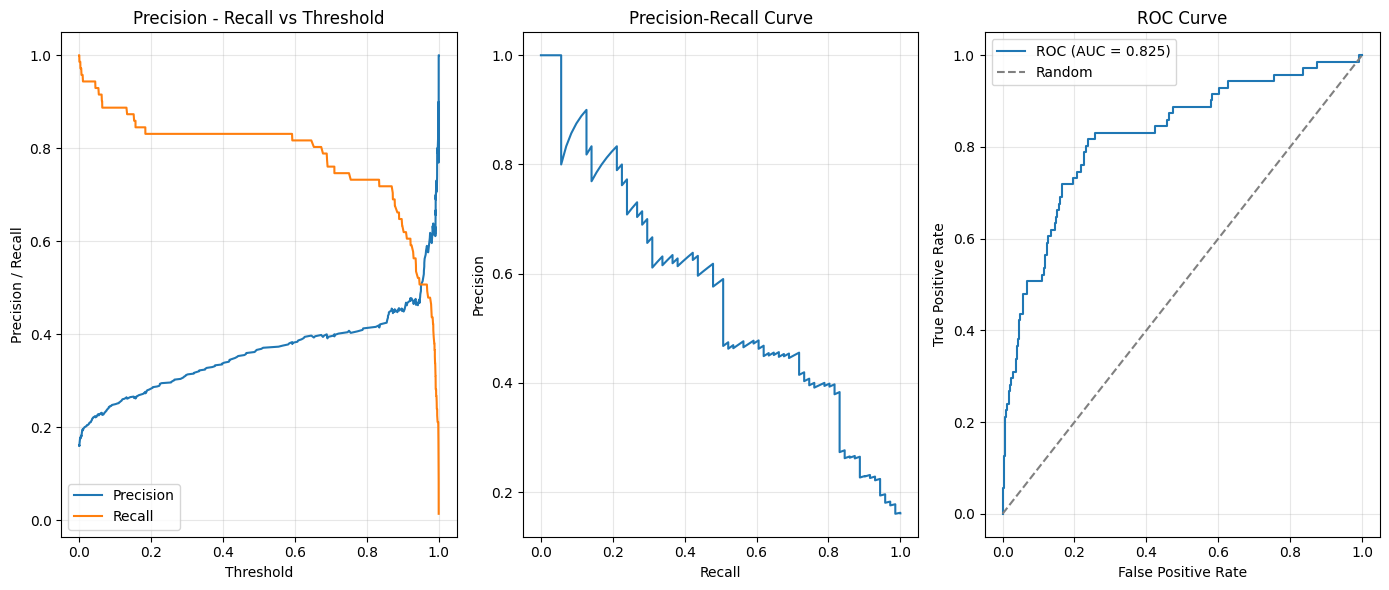

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve

y_scores = xgb_scratch.predict_proba(X_test_origin_t2)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t2, y_scores)

plt.figure(figsize=(14, 6))

# 1. Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precision vs Recall (PR Curve)
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, alpha=0.3)

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t2, y_scores)
auc_score = roc_auc_score(y_test_origin_t2, y_scores)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [78]:
# df = pd.DataFrame({
#     'feature': X_encode_copy.columns,
#     'importance': xgb_scratch.feature_importances_
# }).sort_values('importance', ascending=False)[:40]
#
# df.set_index('feature', inplace=True)
# df.plot(kind='barh', figsize=(10, 10))
# plt.title('Feature Importance according to Random Forest')
# plt.show()

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction_comparison(model,
                               X_train_val, y_train_val,
                               X_test, y_test,
                               threshold=0.5):

    # --- TRAIN/VAL ---
    y_train_proba = model.predict_proba(X_train_val)[:, 1]
    y_train_pred = (y_train_proba >= threshold).astype(int)

    # --- TEST ---
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= threshold).astype(int)

    # --- VẼ HAI SUBPLOT ---
    plt.figure(figsize=(14, 6))

    # ====== PLOT TRAIN / VAL ======
    plt.subplot(1, 2, 1)
    idx_train = np.arange(len(y_train_val))

    correct_idx_train = idx_train[y_train_pred == y_train_val]
    wrong_idx_train = idx_train[y_train_pred != y_train_val]

    plt.scatter(correct_idx_train, y_train_val[correct_idx_train],
                color='green', label='Dự đoán đúng', s=30)
    plt.scatter(wrong_idx_train,  y_train_val[wrong_idx_train],
                color='red', label='Dự đoán sai', s=30, marker='x')

    plt.title("So sánh Dự đoán và Thực tế (Train + Validation)")
    plt.xlabel("Index")
    plt.ylabel("Nhãn (0/1)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # ====== PLOT TEST ======
    plt.subplot(1, 2, 2)
    idx_test = np.arange(len(y_test))

    correct_idx_test = idx_test[y_test_pred == y_test]
    wrong_idx_test = idx_test[y_test_pred != y_test]

    plt.scatter(correct_idx_test, y_test[correct_idx_test],
                color='green', label='Dự đoán đúng', s=30)
    plt.scatter(wrong_idx_test,  y_test[wrong_idx_test],
                color='red', label='Dự đoán sai', s=30, marker='x')

    plt.title("So sánh Dự đoán và Thực tế (Test)")
    plt.xlabel("Index")
    plt.ylabel("Nhãn (0/1)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


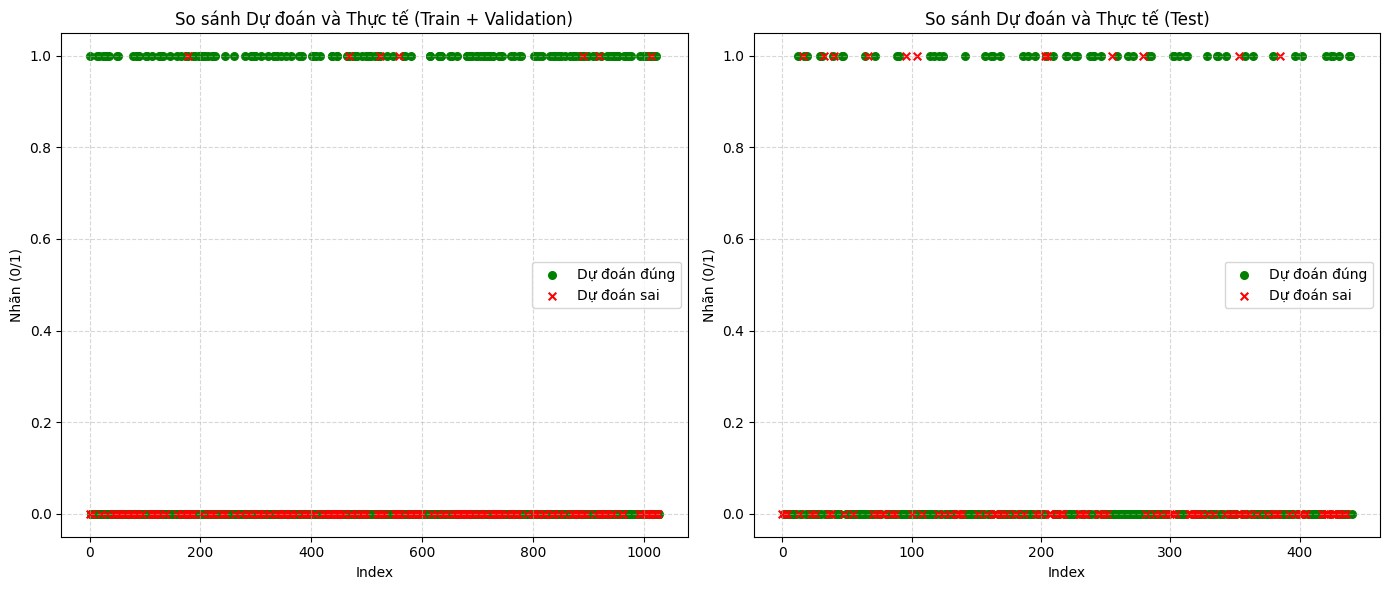

In [80]:
plot_prediction_comparison(
    model=xgb_scratch,
    X_train_val=X_train_origin_t2,
    y_train_val=y_train_origin_t2,
    X_test=X_test_origin_t2,
    y_test=y_test_origin_t2,
    threshold=0.5499999999999999
)

1. ROC AUC Score (Điểm Tiêu Chuẩn Tổng Thể)

- Điểm Test AUC dao động từ 0.817 đến 0.851, đây là một kết quả tốt cho thấy mô hình có khả năng phân biệt tương đối cao giữa hai lớp (Ở lại/Nghỉ việc) trên tập dữ liệu chưa từng thấy.Tuy nhiên, có một khoảng cách đáng kể giữa Train AUC và Test AUC (ví dụ: ở tỉ lệ 8/4, chênh lệch $\approx 0.13$), cho thấy mô hình có thể đang bị Overfitting (Quá khớp) ở một mức độ nào đó trên tập huấn luyện.

2. Hiệu suất cho Lớp Thiểu số (Nghỉ việc - Lớp 1)

- Precision thấp (0.40): Nghĩa là trong số các dự đoán là "Nghỉ việc", chỉ có 40% là đúng. Có nhiều False Positives (FP) (dự đoán nghỉ việc nhưng thực tế ở lại), dẫn đến việc bộ phận HR có thể lãng phí nguồn lực để can thiệp vào những trường hợp không cần thiết.

- Recall tương đối cao (0.68): Nghĩa là mô hình tìm được 68% số trường hợp nghỉ việc thực tế. Điều này tốt vì mục tiêu chính là không bỏ sót (giảm thiểu False Negatives - FN).

- F1-score trung bình (0.50): Là giá trị hài hòa giữa Precision và Recall.

3. So sánh các tỉ lệ chia dữ liệu:

- Các F1-score trên tập kiểm tra đều ở mức trung bình thấp (khoảng 0.50 đến 0.53). Điều này cho thấy mặc dù AUC tốt, mô hình vẫn còn gặp khó khăn trong việc cân bằng giữa Precision và Recall để phân loại chính xác lớp "Nghỉ việc" trong điều kiện thực tế. Tỉ lệ 7/3 cho F1-score cao nhất.

4. Kết Luận Đánh Giá
- Mô hình XGBoost phù hợp để sử dụng trong bài toán này, dựa trên những lý do sau:

- AUC tốt (0.817 - 0.851): Khả năng phân biệt tổng thể của mô hình là mạnh.

- Recall chấp nhận được (khoảng 0.68): Mô hình có khả năng tìm ra phần lớn các trường hợp nghỉ việc thực tế, rất quan trọng cho các hành động can thiệp của HR.

- Tuy nhiên, cần có sự cải thiện do:

    - Overfitting: Khoảng cách lớn giữa Train AUC và Test AUC.

    - Precision thấp cho Lớp 1: Tỉ lệ chính xác khi dự đoán "Nghỉ việc" chỉ khoảng 40%, dẫn đến nhiều dự đoán sai và tốn kém tài nguyên.

    - F1-score chưa cao: Cần tăng cường F1-score lên trên 0.6 hoặc 0.7 để đảm bảo mô hình thực sự hữu ích.